In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import tensorflow as tf
import os
import seaborn as sns
import pathlib

import tensorflow.keras.backend as K
from PIL import Image
from random import sample
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = {
             "train_path" : r"D:\dataset_FS\train",
             "valid_path" : r"D:\dataset_FS\valid",
          }

all_data = []

for path in dataset_path.values():
    data = {"img_path": [] , "label": [] }
    labels = os.listdir(path)

    for label in labels:
        folder_path = os.path.join(path, label)
        file_names = os.listdir(folder_path)
        for file_name in file_names:
            img_path = os.path.join(folder_path, file_name)
            data["img_path"].append(img_path)
            data["label"].append(label)
        
    all_data.append(data.copy())
    data.clear()

In [3]:
train_df = pd.DataFrame.from_dict(all_data[0])
valid_df = pd.DataFrame.from_dict(all_data[1])

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.2|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Encode Label</p>
</h3>

In [4]:
lbe = LabelEncoder()
train_df['encoded_label'] = lbe.fit_transform(train_df['label'])
valid_df['encoded_label'] = lbe.fit_transform(valid_df['label'])

list_class = dict(zip(lbe.classes_, lbe.transform(lbe.classes_)))
num_of_class = len(list_class)

In [5]:
train_df['label'].value_counts(normalize=False)

label
Asian-Green-Bee-Eater        1200
Brown-Headed-Barbet          1200
Cattle-Egret                 1200
Common-Kingfisher            1200
Common-Myna                  1200
Common-Rosefinch             1200
Common-Tailorbird            1200
Coppersmith-Barbet           1200
Forest-Wagtail               1200
Gray-Wagtail                 1200
Hoopoe                       1200
House-Crow                   1200
Indian-Grey-Hornbill         1200
Indian-Peacock               1200
Indian-Pitta                 1200
Indian-Roller                1200
Jungle-Babbler               1200
Northern-Lapwing             1200
Red-Wattled-Lapwing          1200
Ruddy-Shelduck               1200
Rufous-Treepie               1200
Sarus-Crane                  1200
White-Breasted-Kingfisher    1200
White-Breasted-Waterhen      1200
White-Wagtail                1200
Name: count, dtype: int64

In [6]:
valid_df['label'].value_counts(normalize=False)

label
Asian-Green-Bee-Eater        300
Brown-Headed-Barbet          300
Cattle-Egret                 300
Common-Kingfisher            300
Common-Myna                  300
Common-Rosefinch             300
Common-Tailorbird            300
Coppersmith-Barbet           300
Forest-Wagtail               300
Gray-Wagtail                 300
Hoopoe                       300
House-Crow                   300
Indian-Grey-Hornbill         300
Indian-Peacock               300
Indian-Pitta                 300
Indian-Roller                300
Jungle-Babbler               300
Northern-Lapwing             300
Red-Wattled-Lapwing          300
Ruddy-Shelduck               300
Rufous-Treepie               300
Sarus-Crane                  300
White-Breasted-Kingfisher    300
White-Breasted-Waterhen      300
White-Wagtail                300
Name: count, dtype: int64

In [7]:
df = pd.concat([train_df, valid_df], ignore_index=True)
df

,img_path,label,encoded_label
0,D:\dataset_FS\train\Asian-Green-Bee-Eater\Brow...,Asian-Green-Bee-Eater,0
1,D:\dataset_FS\train\Asian-Green-Bee-Eater\Brow...,Asian-Green-Bee-Eater,0
2,D:\dataset_FS\train\Asian-Green-Bee-Eater\Brow...,Asian-Green-Bee-Eater,0
3,D:\dataset_FS\train\Asian-Green-Bee-Eater\Brow...,Asian-Green-Bee-Eater,0
4,D:\dataset_FS\train\Asian-Green-Bee-Eater\Brow...,Asian-Green-Bee-Eater,0
...,...,...,...
37495,D:\dataset_FS\valid\White-Wagtail\White-Wagtai...,White-Wagtail,24
37496,D:\dataset_FS\valid\White-Wagtail\White-Wagtai...,White-Wagtail,24
37497,D:\dataset_FS\valid\White-Wagtail\White-Wagtai...,White-Wagtail,24
37498,D:\dataset_FS\valid\White-Wagtail\White-Wagtai...,White-Wagtail,24


In [8]:
df['label'].value_counts()

label
Asian-Green-Bee-Eater        1500
Brown-Headed-Barbet          1500
Cattle-Egret                 1500
Common-Kingfisher            1500
Common-Myna                  1500
Common-Rosefinch             1500
Common-Tailorbird            1500
Coppersmith-Barbet           1500
Forest-Wagtail               1500
Gray-Wagtail                 1500
Hoopoe                       1500
House-Crow                   1500
Indian-Grey-Hornbill         1500
Indian-Peacock               1500
Indian-Pitta                 1500
Indian-Roller                1500
Jungle-Babbler               1500
Northern-Lapwing             1500
Red-Wattled-Lapwing          1500
Ruddy-Shelduck               1500
Rufous-Treepie               1500
Sarus-Crane                  1500
White-Breasted-Kingfisher    1500
White-Breasted-Waterhen      1500
White-Wagtail                1500
Name: count, dtype: int64

<h3 style="color: black; font-size: 25px !important;
          font-family: Calibri;">
    <b style="color: #43766C; display: inline-block; font-size: 20px !important;">2.4|</b><p style="color: #D5F0C1;font-size: 20px !important; display: inline-block;">Split Data into Train, Valid & Test</p>
</h3>

In [9]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, test_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['label'])

In [10]:
train_df

,img_path,label,encoded_label
21427,D:\dataset_FS\train\Northern-Lapwing\Northern-...,Northern-Lapwing,17
26358,D:\dataset_FS\train\Sarus-Crane\Sarus-Crane__5...,Sarus-Crane,21
2333,D:\dataset_FS\train\Brown-Headed-Barbet\Brown-...,Brown-Headed-Barbet,1
35420,D:\dataset_FS\valid\Red-Wattled-Lapwing\NRed-W...,Red-Wattled-Lapwing,18
31898,D:\dataset_FS\valid\Common-Tailorbird\Common-T...,Common-Tailorbird,6
...,...,...,...
13838,D:\dataset_FS\train\House-Crow\House-Crow_381.jpg,House-Crow,11
35270,D:\dataset_FS\valid\Northern-Lapwing\Northern-...,Northern-Lapwing,17
36907,D:\dataset_FS\valid\White-Breasted-Waterhen\Wh...,White-Breasted-Waterhen,23
11590,D:\dataset_FS\train\Gray-Wagtail\Gray-Wagtail_...,Gray-Wagtail,9


In [11]:
train_df['label'].value_counts()

label
Northern-Lapwing             1080
Sarus-Crane                  1080
Brown-Headed-Barbet          1080
Red-Wattled-Lapwing          1080
Common-Tailorbird            1080
Common-Kingfisher            1080
Jungle-Babbler               1080
Ruddy-Shelduck               1080
White-Wagtail                1080
Gray-Wagtail                 1080
White-Breasted-Waterhen      1080
Indian-Pitta                 1080
Indian-Peacock               1080
Indian-Grey-Hornbill         1080
Hoopoe                       1080
Rufous-Treepie               1080
Indian-Roller                1080
White-Breasted-Kingfisher    1080
Common-Myna                  1080
Forest-Wagtail               1080
Asian-Green-Bee-Eater        1080
Coppersmith-Barbet           1080
House-Crow                   1080
Common-Rosefinch             1080
Cattle-Egret                 1080
Name: count, dtype: int64

In [12]:
valid_df['label'].value_counts()

label
Indian-Roller                300
Gray-Wagtail                 300
Common-Kingfisher            300
White-Breasted-Kingfisher    300
Cattle-Egret                 300
Common-Rosefinch             300
Sarus-Crane                  300
White-Wagtail                300
Jungle-Babbler               300
Indian-Grey-Hornbill         300
Ruddy-Shelduck               300
Indian-Peacock               300
House-Crow                   300
Hoopoe                       300
Brown-Headed-Barbet          300
Common-Myna                  300
Forest-Wagtail               300
White-Breasted-Waterhen      300
Red-Wattled-Lapwing          300
Coppersmith-Barbet           300
Rufous-Treepie               300
Asian-Green-Bee-Eater        300
Indian-Pitta                 300
Common-Tailorbird            300
Northern-Lapwing             300
Name: count, dtype: int64

In [13]:
test_df['label'].value_counts()

label
Sarus-Crane                  120
Indian-Roller                120
White-Breasted-Waterhen      120
White-Wagtail                120
Indian-Grey-Hornbill         120
Common-Tailorbird            120
Hoopoe                       120
Common-Kingfisher            120
Jungle-Babbler               120
Red-Wattled-Lapwing          120
Indian-Pitta                 120
Brown-Headed-Barbet          120
House-Crow                   120
Gray-Wagtail                 120
Coppersmith-Barbet           120
Common-Rosefinch             120
Common-Myna                  120
Indian-Peacock               120
Asian-Green-Bee-Eater        120
Ruddy-Shelduck               120
Forest-Wagtail               120
Rufous-Treepie               120
Cattle-Egret                 120
Northern-Lapwing             120
White-Breasted-Kingfisher    120
Name: count, dtype: int64

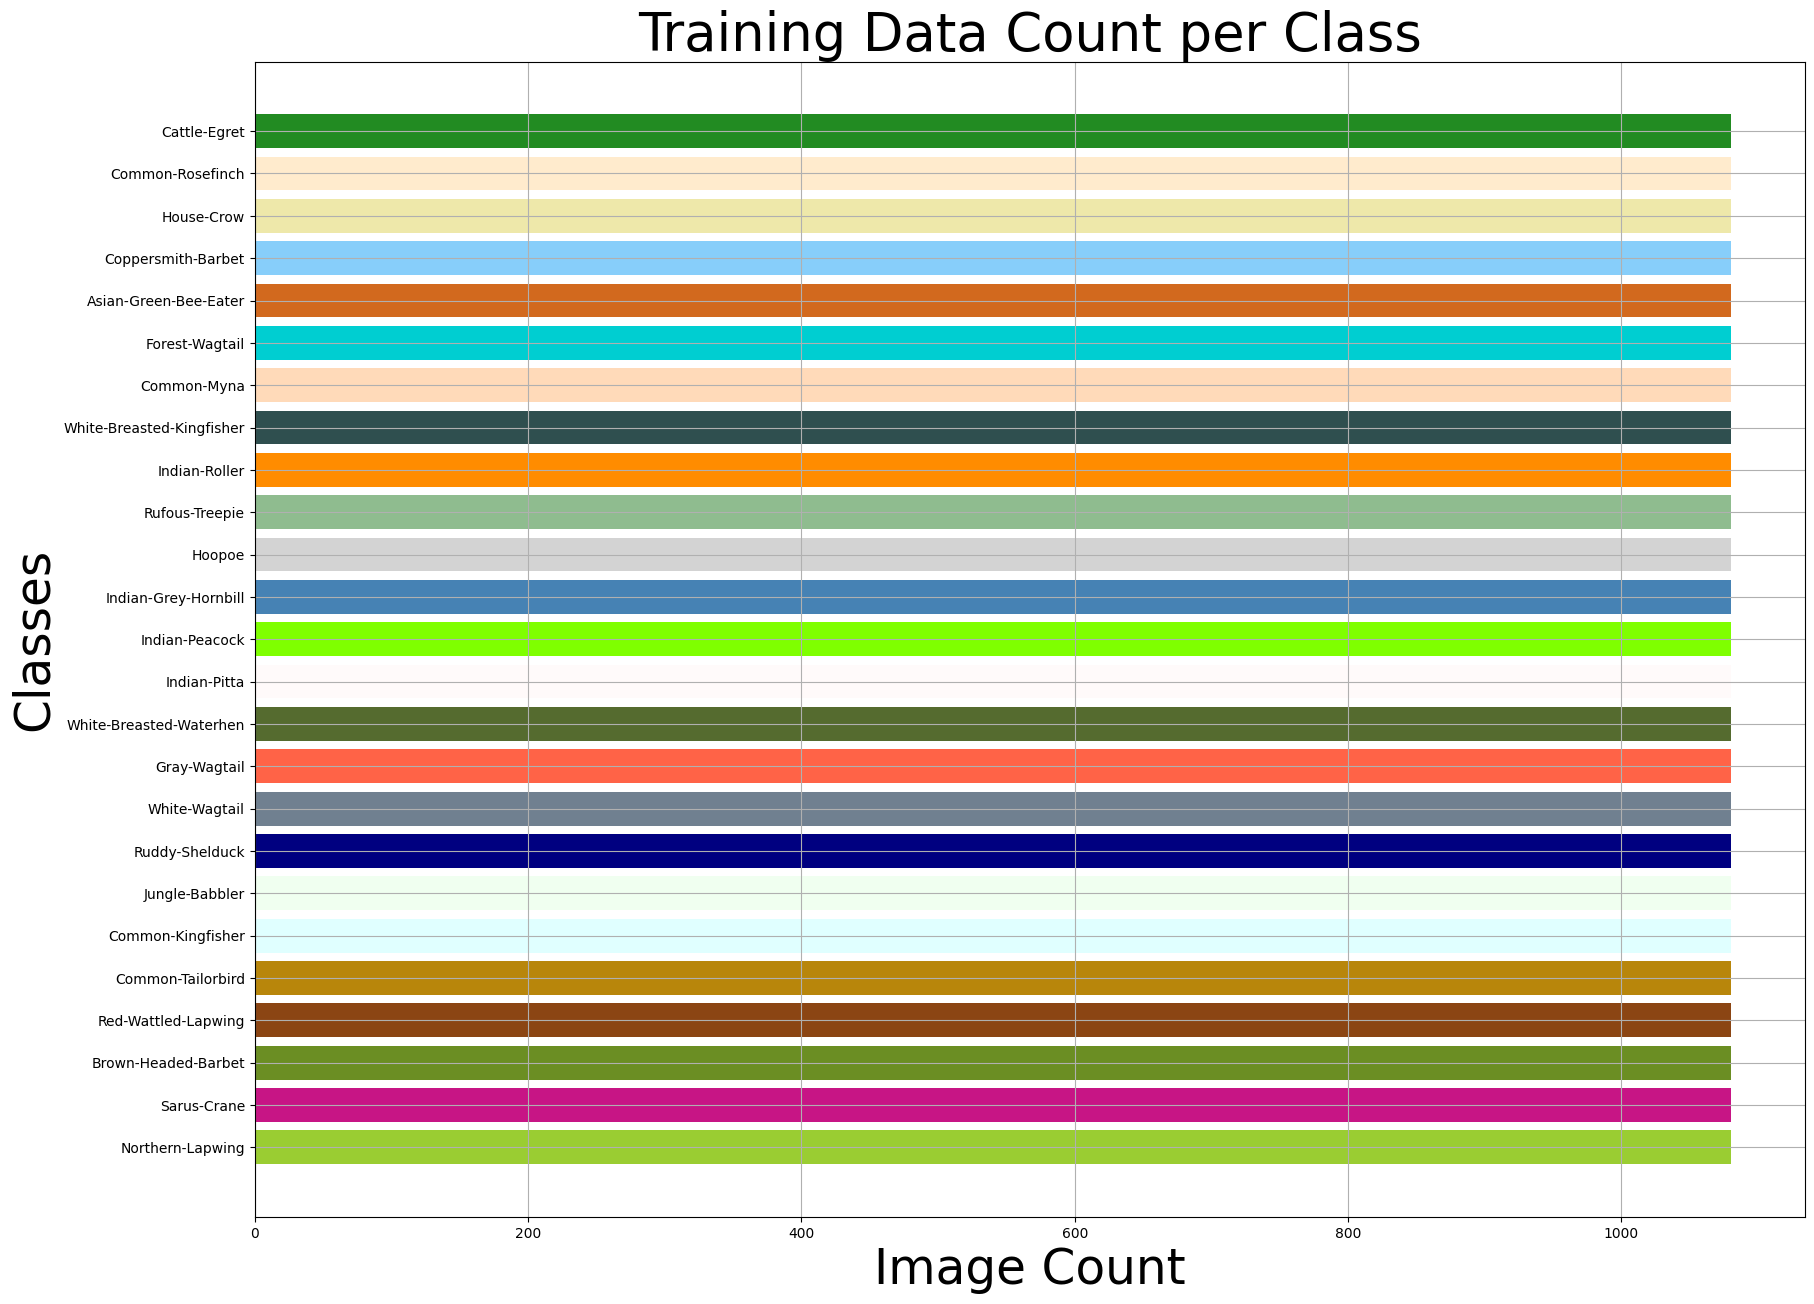

In [14]:
train  = train_df["label"].value_counts()
label = train.tolist()
index = train.index.tolist()

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, num_of_class)

plt.figure(figsize=(20,15))
plt.title("Training Data Count per Class",fontsize=38)
plt.xlabel('Image Count', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index, label, color=colors)
plt.grid(True)
plt.show()

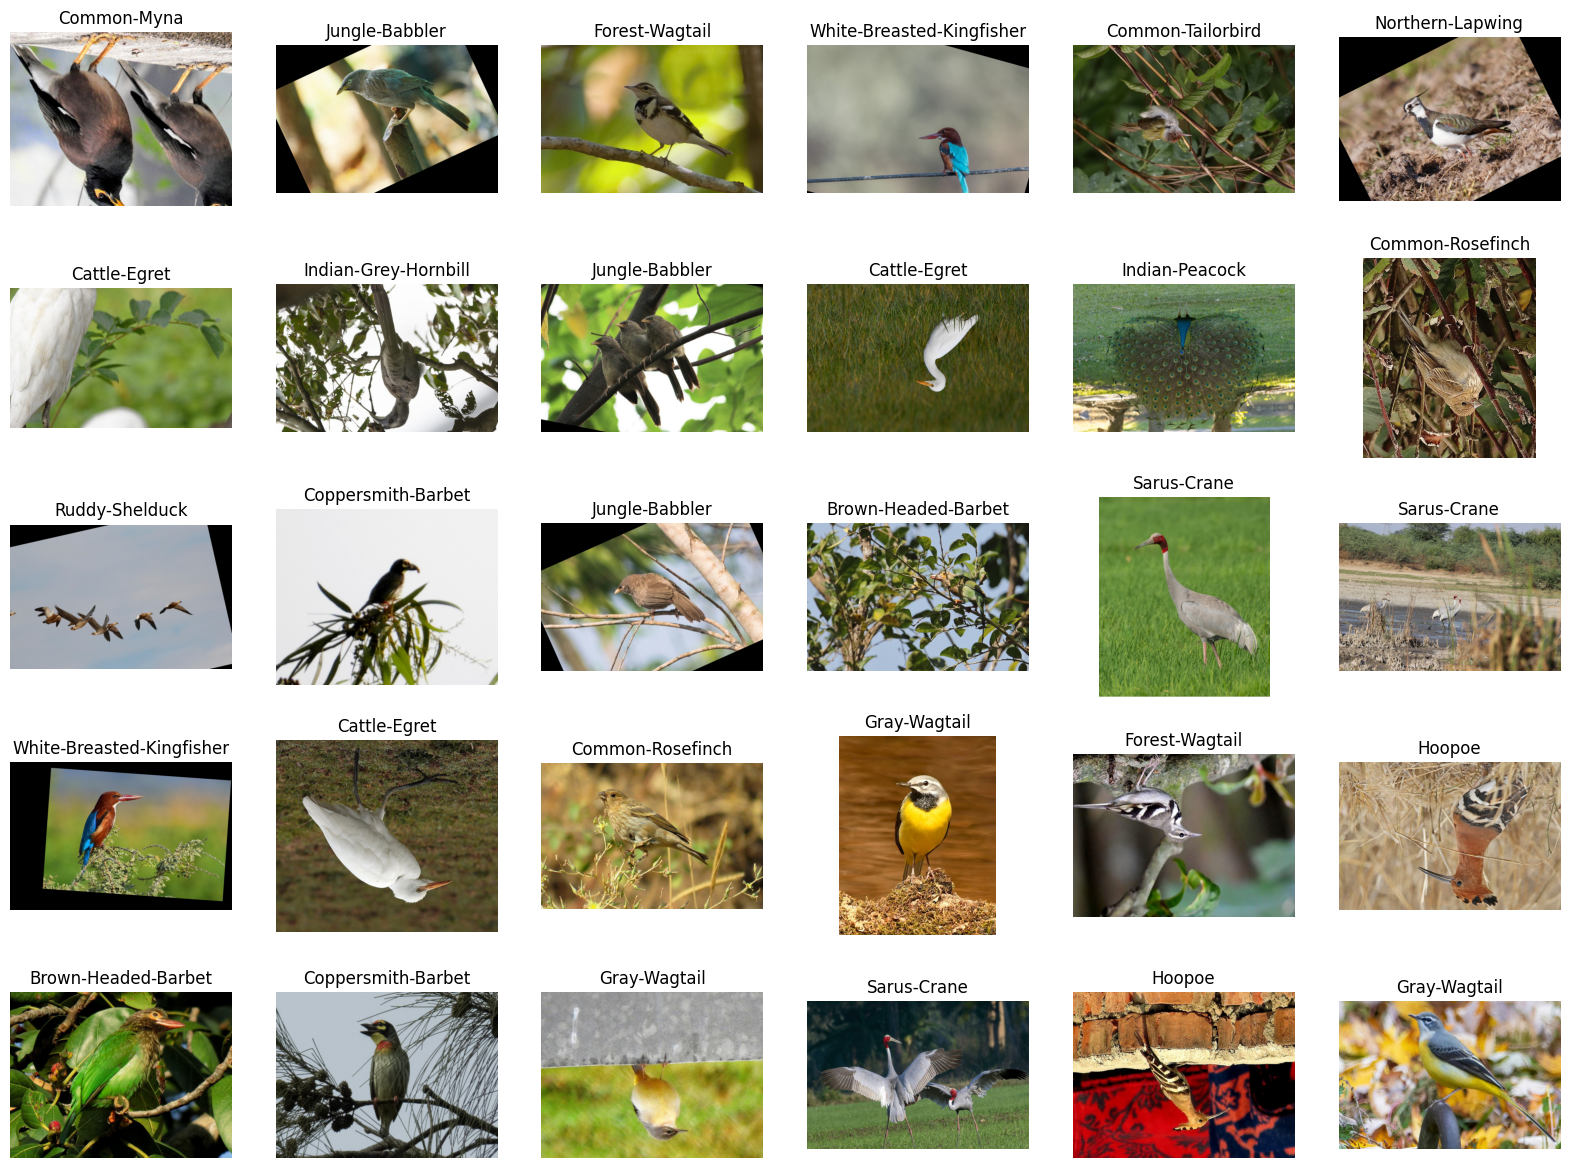

In [15]:
plt.figure(figsize=(20,15))
for i, row in valid_df.sample(n=30).reset_index().iterrows():
    plt.subplot(5,6,i+1)
    image_path = row['img_path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["label"])
    plt.axis('off')
    
plt.show()

In [16]:
%%time

batch_size = 32
img_height, img_width = 224, 224

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
#     rescale = 1./255
)

CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
def load_data(df):
    return generator.flow_from_dataframe(
        dataframe=df,
        x_col='img_path',
        y_col='label',
        target_size=(img_height, img_width),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
        seed=42,
    )

# Split the data into three categories.
train_images = load_data(train_df)
val_images = load_data(valid_df)
test_images = load_data(test_df)

Found 27000 validated image filenames belonging to 25 classes.
Found 7500 validated image filenames belonging to 25 classes.
Found 3000 validated image filenames belonging to 25 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


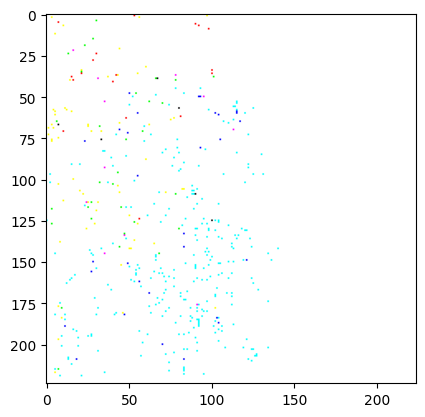

In [18]:
test_img, test_labels = next(test_images)
plt.imshow(test_img[23])

In [19]:
train_images[i][1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..244.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..252.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [16.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB da

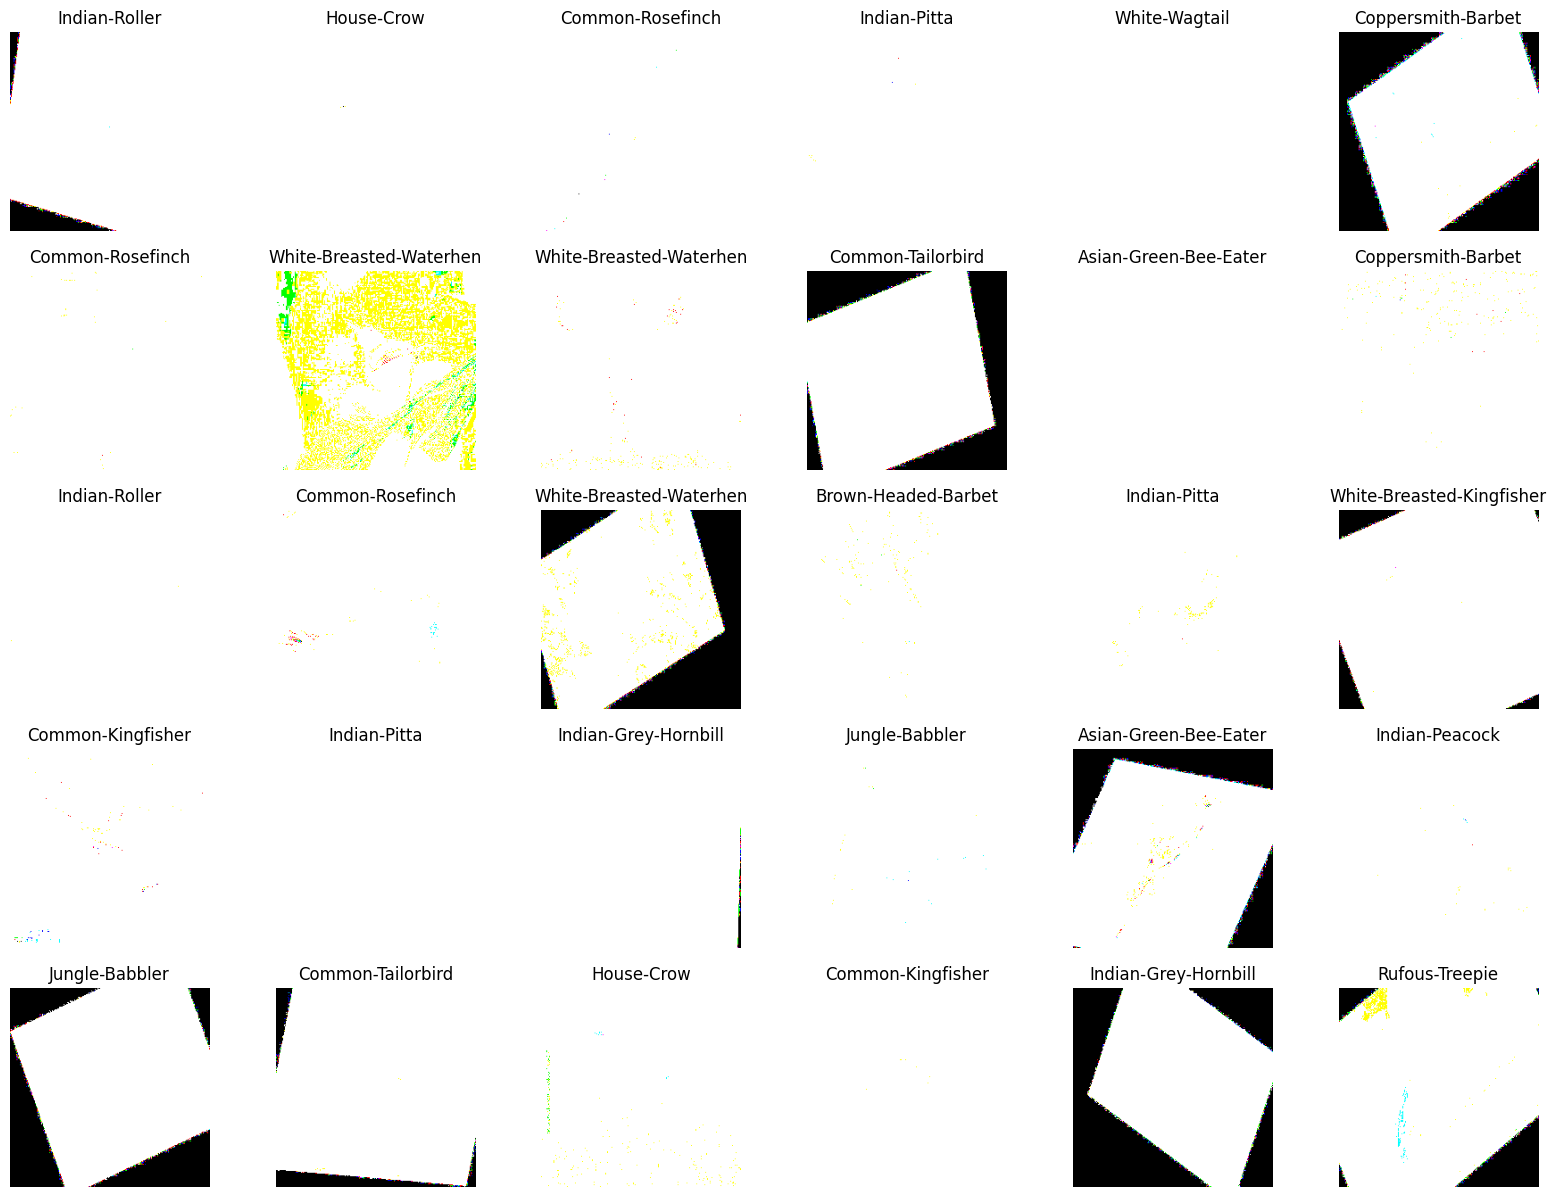

In [20]:
plt.figure(figsize=(20,15))
for i, row in valid_df.sample(n=30).reset_index().iterrows():
    plt.subplot(5,6,i+1)
    plt.imshow(train_images[i][0][0])
    plt.title(row["label"])
    plt.axis('off')
    
plt.show()

In [21]:
%%time

# Load the pretained model
effnet = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet')

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(effnet.layers):
    effnet.layers[i].trainable = False

CPU times: total: 984 ms
Wall time: 2.49 s


In [22]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [23]:
# augmentation layers
augmentation = tf.keras.Sequential([                                    
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
], name='augmentation_layers')

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(img_height, img_width, 3)))
model.add(augmentation)
model.add(effnet)
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling2D())
model.add(tf.keras.layers.Dense(num_of_class, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', f1, precision, recall]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ augmentation_layers (Sequential)     │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 7, 7, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3, 3, 256)           │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,183,432 (42.66 MB)

 Trainable params: 399,897 (1.53 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [24]:
# tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                        patience=3,
                                        verbose=1,
                                        factor=0.2,
                                        min_lr=0.000003)

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # correct metric name
    patience=4,
    restore_best_weights=True,
    verbose=1,
    mode='max'               # tells Keras to look for highest value
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=r"D:\modelot\wgt.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [learning_rate_reduction, es, model_checkpoint]

In [29]:
with open("class_names.txt", "w") as f:
    for class_name in lbe.classes_:
        f.write(f"{class_name}\n")

In [61]:
history_tl = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=8,
                    verbose=1,
                    callbacks=[callbacks]
                   )

model.save_weights(r"D:\modelot\my_checkpoint_tflr.weights.h5")
model.save(r"D:\modelot\final_model_transfer_learning.keras")

Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.9565 - f1: 0.9578 - loss: 0.1473 - precision: 0.9627 - recall: 0.9531
Epoch 1: val_accuracy did not improve from 0.95867
844/844 ━━━━━━━━━━━━━━━━━━━━ 721s 855ms/step - accuracy: 0.9565 - f1: 0.9578 - loss: 0.1473 - precision: 0.9627 - recall: 0.9531 - val_accuracy: 0.9580 - val_f1: 0.9592 - val_loss: 0.1644 - val_precision: 0.9621 - val_recall: 0.9564 - learning_rate: 0.0010
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.9573 - f1: 0.9575 - loss: 0.1429 - precision: 0.9621 - recall: 0.9530
Epoch 2: val_accuracy did not improve from 0.95867
844/844 ━━━━━━━━━━━━━━━━━━━━ 774s 917ms/step - accuracy: 0.9572 - f1: 0.9575 - loss: 0.1429 - precision: 0.9621 - recall: 0.9530 - val_accuracy: 0.9545 - val_f1: 0.9549 - val_loss: 0.2044 - val_precision: 0.9578 - val_recall: 0.9522 - learning_rate: 0.0010
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.9569 - f1: 0.9575 - loss: 0.1493 - precisio

844/844 ━━━━━━━━━━━━━━━━━━━━ 785s 930ms/step - accuracy: 0.9569 - f1: 0.9575 - loss: 0.1493 - precision: 0.9617 - recall: 0.9534 - val_accuracy: 0.9648 - val_f1: 0.9657 - val_loss: 0.1550 - val_precision: 0.9684 - val_recall: 0.9631 - learning_rate: 0.0010
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9623 - f1: 0.9628 - loss: 0.1373 - precision: 0.9662 - recall: 0.9595
Epoch 4: val_accuracy did not improve from 0.96480
844/844 ━━━━━━━━━━━━━━━━━━━━ 707s 838ms/step - accuracy: 0.9623 - f1: 0.9628 - loss: 0.1373 - precision: 0.9662 - recall: 0.9595 - val_accuracy: 0.9633 - val_f1: 0.9639 - val_loss: 0.1526 - val_precision: 0.9656 - val_recall: 0.9623 - learning_rate: 0.0010
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9609 - f1: 0.9616 - loss: 0.1359 - precision: 0.9654 - recall: 0.9579
Epoch 5: val_accuracy did not improve from 0.96480
844/844 ━━━━━━━━━━━━━━━━━━━━ 712s 843ms/step - accuracy: 0.9609 - f1: 0.9616 - loss: 0.1359 - precision: 0.965

In [27]:
import matplotlib.pyplot as plt

# draw accuracy & lost graph
def train_plot(history):

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    acc_plot, = plt.plot(epochs, acc, 'r')
    val_acc_plot, = plt.plot(epochs, val_acc, 'b')
    plt.title('Training and Validation Accuracy')
    plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

    # Loss plot
    plt.subplot(1, 2, 2)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    loss_plot, = plt.plot(epochs, loss, 'r')
    val_loss_plot, = plt.plot(epochs, val_loss, 'b')
    plt.title('Training and Validation Loss')
    plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [28]:
train_plot(history_tl)

NameError: name 'history_tl' is not defined

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Class-label mapping obtained from `BBC Document Classification Part 1` kernel.

def evaluate(model):

    pred = model.predict(test_images)
    y_pred = np.argmax(pred, axis=1)
    y_true = test_images.classes
    
    c_mat = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(30, 30))
    hm = sns.heatmap(
        c_mat,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar=False,
        linecolor="white",
        linewidths=1,
        xticklabels=test_images.class_indices.keys(),
        yticklabels=test_images.class_indices.keys(),
    )
    
    hm.tick_params(axis='x', labelrotation=45)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")
    
    print(f"\nAccuracy: {accuracy_score(y_true, y_pred)}")
    print("\nClassification Report\n")
    print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))
    
    classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
    pred_df = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))), 
                            "Test Labels" : test_images.labels, 
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                               })
    print(pred_df.head(8))

94/94 ━━━━━━━━━━━━━━━━━━━━ 78s 807ms/step

Accuracy: 0.968

Classification Report

                           precision    recall  f1-score   support

    Asian-Green-Bee-Eater       0.99      0.98      0.99       120
      Brown-Headed-Barbet       0.99      0.94      0.97       120
             Cattle-Egret       0.98      0.98      0.98       120
        Common-Kingfisher       0.97      0.99      0.98       120
              Common-Myna       0.97      0.94      0.96       120
         Common-Rosefinch       0.97      0.95      0.96       120
        Common-Tailorbird       0.97      0.97      0.97       120
       Coppersmith-Barbet       0.93      0.97      0.95       120
           Forest-Wagtail       0.93      1.00      0.96       120
             Gray-Wagtail       0.98      0.98      0.98       120
                   Hoopoe       1.00      0.95      0.97       120
               House-Crow       0.96      0.93      0.95       120
     Indian-Grey-Hornbill       0.90      0.9

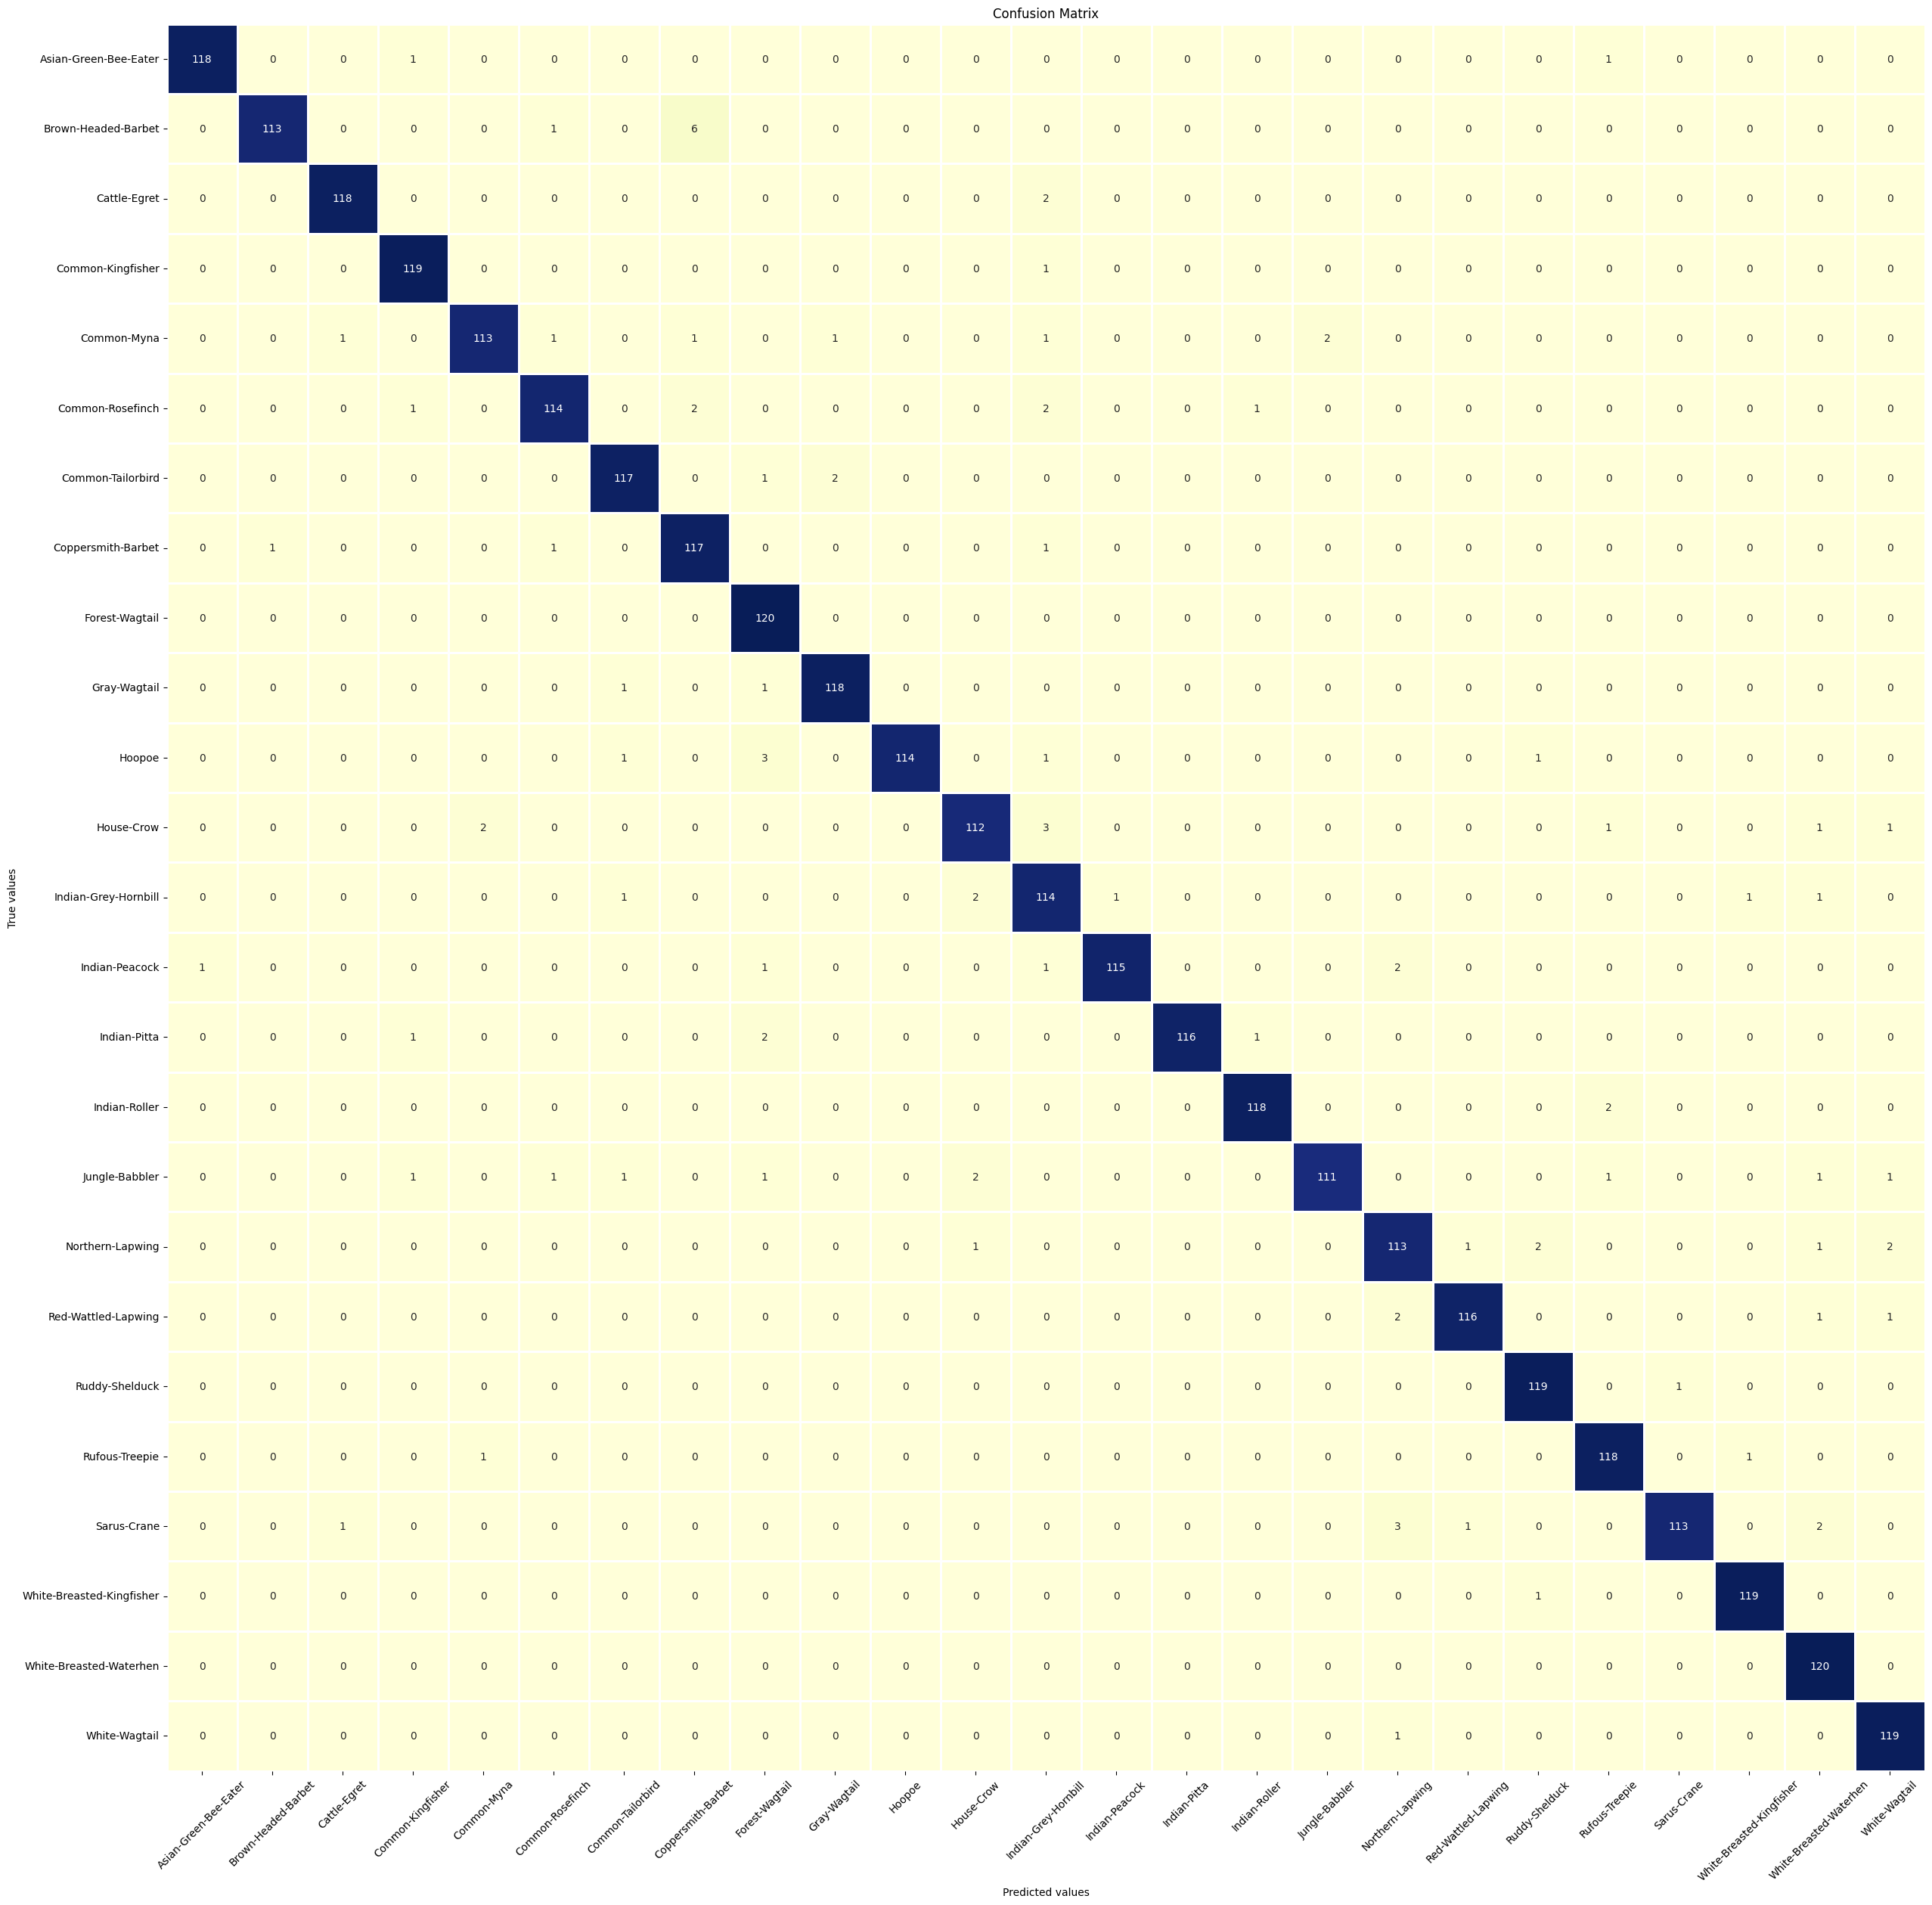

In [65]:
evaluate(model)